### 1. Linear regression with gradient descent

### 1.1 Please build a gradient descent algorithm based on the following formulas

In [788]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [789]:
# Load the dataset
data = pd.read_csv("housing.csv")

In [790]:
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [791]:
data.tail()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
541,91500,4800,3,2,4,yes,yes,no,no,yes,0,no
542,94000,6000,3,2,4,yes,no,no,no,yes,0,no
543,103000,6000,3,2,4,yes,yes,no,no,yes,1,no
544,105000,6000,3,2,2,yes,yes,no,no,yes,1,no
545,105000,6000,3,1,2,yes,no,no,no,yes,1,no


In [792]:
# Extract features and target
X = data[['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']]
y = data['price'].values  # Target variable

In [793]:
# Convert categorical variables into dummy/indicator variables
multi_category_columns = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
X = pd.get_dummies(X, columns=multi_category_columns, drop_first=True)

In [794]:
# Handle missing values for numeric columns only
numeric_columns = X.select_dtypes(include=[np.number]).columns
X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].mean())
y = np.nan_to_num(y, nan=np.mean(y))

In [795]:
# Normalize features (X)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std
X_norm = np.c_[np.ones(X_norm.shape[0]), X_norm]

In [796]:
# Cost function
def compute_cost(X, y, weights):
    m = len(y)
    predictions = X.dot(weights)
    cost = (1 / m) * np.sum((predictions - y) ** 2)
    return cost

# RMSE calculation
def compute_rmse(predictions, y):
    rmse = np.sqrt(np.mean((predictions - y) ** 2))
    return rmse


In [797]:
# Gradient function
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    cost_history = []
    rmse_history = []
    
    for epoch in range(epochs):
        # Compute predictions
        predictions = X.dot(weights)
        
        # Compute gradients
        gradients = (2 / m) * X.T.dot(predictions - y)
        
        # Update weights
        weights -= learning_rate * gradients
        
        # Calculate and store cost and RMSE for tracking
        cost = compute_cost(X, y, weights)
        rmse = compute_rmse(predictions, y)
        cost_history.append(cost)
        rmse_history.append(rmse)
        
        # Print RMSE for each iteration
        print(f"Epoch {epoch + 1}, Cost: {cost:.4f}, RMSE: {rmse:.4f}")
    
    return weights, cost_history, rmse_history


In [798]:
# Initialize weights with small random values
initial_weights = np.zeros(X_norm.shape[1])

# Set learning rate and epochs
learning_rate = 0.25
epochs = 10

# Run gradient descent using normalized X and normalized y
optimal_weights, cost_history, rmse_history = gradient_descent(X_norm, y, initial_weights, learning_rate, epochs)


Epoch 1, Cost: 1416389571.1897, RMSE: 73159.2694
Epoch 2, Cost: 527869294.5460, RMSE: 37634.9515
Epoch 3, Cost: 307529036.8101, RMSE: 22975.4063
Epoch 4, Cost: 251985003.9161, RMSE: 17536.5058
Epoch 5, Cost: 237820581.7094, RMSE: 15874.0355
Epoch 6, Cost: 234130598.6223, RMSE: 15421.4325
Epoch 7, Cost: 233126981.9353, RMSE: 15301.3267
Epoch 8, Cost: 232830743.8341, RMSE: 15268.4964
Epoch 9, Cost: 232730755.2937, RMSE: 15258.7923
Epoch 10, Cost: 232690628.3183, RMSE: 15255.5156


In [799]:
# Make predictions on normalized data
predictions = X_norm.dot(optimal_weights)


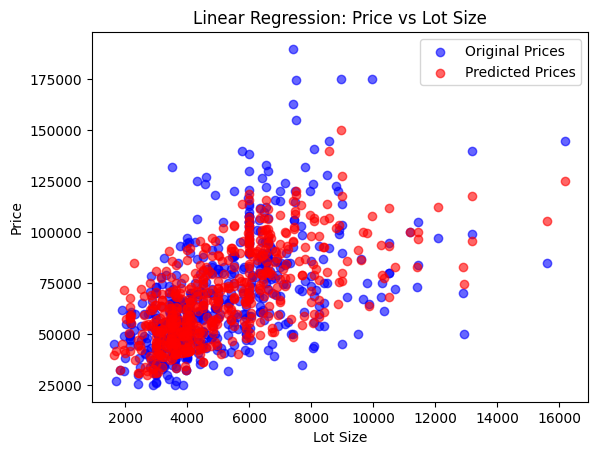

In [800]:
# Extract lotsize (original scale) for plotting
lotsize = data['lotsize'].values
price = data['price'].values

# Plot true prices vs predicted prices
plt.scatter(lotsize, price, color='blue',alpha=0.6, label='Original Prices')
plt.scatter(lotsize, predictions, color='red', alpha=0.6 , label='Predicted Prices')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Lot Size')
plt.legend()
plt.show()


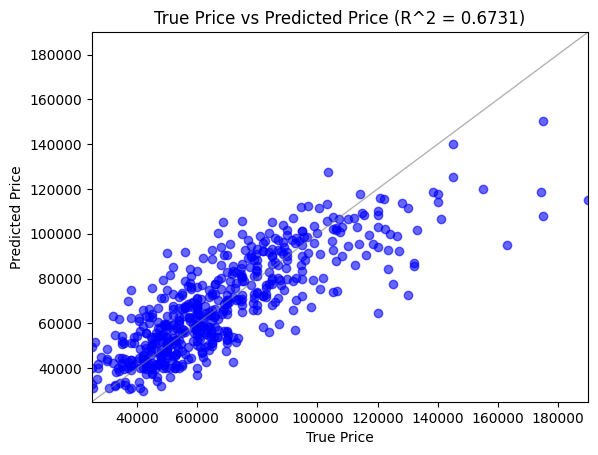

In [801]:
# Function to calculate R^2 score manually
def calculate_r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

# Calculate R^2 score
r2 = calculate_r2(y, predictions)

# Plot true price vs predicted price on original scale
plt.scatter(y, predictions, color='blue', alpha=0.6)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title(f'True Price vs Predicted Price (R^2 = {r2:.4f})')

# Add reference line y=x for perfect predictions
min_val = min(min(y), min(predictions))
max_val = max(max(y), max(predictions))
plt.plot([min_val, max_val], [min_val, max_val], color='grey', alpha=0.6, linewidth=1)

# Set axis limits
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

plt.show()


In [ ]:
# Load the dataset
data = pd.read_csv("housing.csv")  # Replace with the path to your dataset

# Extract features and target
X = data[['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']]
y = data['price'].values  # Target variable remains on the original scale

# Convert categorical variables into dummy/indicator variables
multi_category_columns = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
X = pd.get_dummies(X, columns=multi_category_columns, drop_first=True)

# Handle missing values for numeric columns only
numeric_columns = X.select_dtypes(include=[np.number]).columns
X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].mean())
y = np.nan_to_num(y, nan=np.mean(y))  # Replace NaNs in the target with the mean (if any)

# Normalize features (X) only, leave y as is
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std
X_norm = np.c_[np.ones(X_norm.shape[0]), X_norm]  # Add bias (intercept) term

# Cost function J based on the professor's MSE formula
def compute_cost(X, y, weights):
    m = len(y)
    predictions = X.dot(weights)
    cost = (1 / m) * np.sum((predictions - y) ** 2)
    return cost

# RMSE calculation
def compute_rmse(predictions, y):
    rmse = np.sqrt(np.mean((predictions - y) ** 2))
    return rmse

# Gradient descent algorithm with RMSE calculation
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    cost_history = []
    rmse_history = []
    
    for epoch in range(epochs):
        predictions = X.dot(weights)
        
        # Calculate gradients
        gradients = (2 / m) * X.T.dot(predictions - y)
        weights -= learning_rate * gradients
        
        # Calculate and store the cost and RMSE
        cost = compute_cost(X, y, weights)
        rmse = compute_rmse(predictions, y)
        cost_history.append(cost)
        rmse_history.append(rmse)
        print(f"Epoch {epoch + 1}, Cost (MSE): {cost:.4f}, RMSE: {rmse:.4f}")
    
    return weights, cost_history, rmse_history

# Initialize weights with small random values
initial_weights = np.random.randn(X_norm.shape[1]) * 0.01

# Set learning rate and epochs
learning_rate = 0.25
epochs = 10

# Run gradient descent using normalized X and y
optimal_weights, cost_history, rmse_history = gradient_descent(X_norm, y, initial_weights, learning_rate, epochs)

# Make predictions
predictions = X_norm.dot(optimal_weights)

# Plot original vs predicted prices on the original scale
plt.scatter(data['lotsize'], y, color='blue', alpha=0.6, label='Original Prices')
plt.scatter(data['lotsize'], predictions, color='red', alpha=0.6, label='Predicted Prices')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Price vs Lot Size')
plt.legend()
plt.show()

# Function to calculate R^2 score manually
def calculate_r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

# Calculate R^2 score
r2 = calculate_r2(y, predictions)

# Plot true price vs predicted price on original scale
plt.scatter(y, predictions, color='blue', alpha=0.6)
plt.xlabel('True Price (y)')
plt.ylabel('Predicted Price')
plt.title(f'True Price vs Predicted Price (R^2 = {r2:.4f})')

# Add reference line y=x for perfect predictions
min_val = min(min(y), min(predictions))
max_val = max(max(y), max(predictions))
plt.plot([min_val, max_val], [min_val, max_val], color='grey', alpha=0.6, linewidth=1)

# Set axis limits
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

plt.show()


### 1.2 Please build a gradient descent algorithm based on the following cost function


In [802]:
# Load dataset
data = pd.read_csv("housing.csv")  # Replace with your file path
X = data[['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']]
y = data['price'].values

In [803]:
# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea'], drop_first=True)

In [804]:
# Normalize X and add bias term
X = (X - X.mean()) / X.std()
X = np.c_[np.ones(X.shape[0]), X]  # Add intercept

In [805]:
# Initialize weights
m, n = X.shape
weights = np.random.randn(n) * 0.01
learning_rate = 0.1
epochs = 10

In [806]:
# RMSE calculation
def compute_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

Epoch 1: RMSE = 73159.2923, Cost = 5352282042.7397
Epoch 2: RMSE = 57871.5331, Cost = 3349114345.9300
Epoch 3: RMSE = 46723.7965, Cost = 2183113160.2389
Epoch 4: RMSE = 38333.0735, Cost = 1469424521.3210
Epoch 5: RMSE = 31963.5832, Cost = 1021670652.4827
Epoch 6: RMSE = 27156.9495, Cost = 737499903.9925
Epoch 7: RMSE = 23583.5711, Cost = 556184825.0800
Epoch 8: RMSE = 20981.0321, Cost = 440203709.5859
Epoch 9: RMSE = 19128.9607, Cost = 365917136.9990
Epoch 10: RMSE = 17840.8911, Cost = 318297394.5426


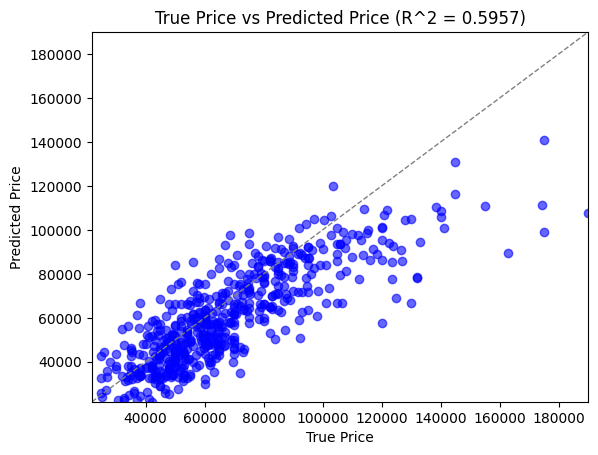

In [807]:
# Gradient descent with the specified cost function
for epoch in range(epochs):
    predictions = X.dot(weights)
    error = predictions - y  # Using (predicted - true) as specified in the formula
    cost = (1 / m) * (error.T @ error)  # Cost function J = (1/m) * (Y_hat - Y)^T * (Y_hat - Y)
    gradient = (2 / m) * X.T.dot(error)  # Gradient of the cost function
    weights -= learning_rate * gradient
    
    # Calculate and print RMSE
    rmse = compute_rmse(y, predictions)
    print(f"Epoch {epoch + 1}: RMSE = {rmse:.4f}, Cost = {cost:.4f}")

# Calculate final predictions with optimized weights
predictions = X.dot(weights)

# Calculate final predictions with optimized weights
predictions = X.dot(weights)

# Calculate R^2 score manually
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - predictions) ** 2)
r2 = 1 - (ss_residual / ss_total)

# Plot true price vs predicted price
plt.scatter(y, predictions, color='blue', alpha=0.6)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title(f'True Price vs Predicted Price (R^2 = {r2:.4f})')

# Add y=x line for reference
min_val = min(min(y), min(predictions))
max_val = max(max(y), max(predictions))
plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--', linewidth=1)
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

plt.show()

In [ ]:
# Load dataset
data = pd.read_csv("housing.csv")  # Replace with your file path
X = data[['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']]
y = data['price'].values

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea'], drop_first=True)

# Normalize X and add bias term
X = (X - X.mean()) / X.std()
X = np.c_[np.ones(X.shape[0]), X]  # Add intercept

# Initialize weights
m, n = X.shape
weights = np.random.randn(n) * 0.01
learning_rate = 0.25
epochs = 10

# RMSE calculation
def compute_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Gradient descent with the specified cost function
for epoch in range(epochs):
    predictions = X.dot(weights)
    error = predictions - y  # Using (predicted - true) as specified in the formula
    cost = (1 / m) * (error.T @ error)  # Cost function J = (1/m) * (Y_hat - Y)^T * (Y_hat - Y)
    gradient = (2 / m) * X.T.dot(error)  # Gradient of the cost function
    weights -= learning_rate * gradient
    
    # Calculate and print RMSE
    rmse = compute_rmse(y, predictions)
    print(f"Epoch {epoch + 1}: RMSE = {rmse:.4f}, Cost = {cost:.4f}")

# Calculate final predictions with optimized weights
predictions = X.dot(weights)

# Calculate R^2 score manually
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - predictions) ** 2)
r2 = 1 - (ss_residual / ss_total)

# Plot true price vs predicted price
plt.scatter(y, predictions, color='blue', alpha=0.6)
plt.xlabel('True Price (y)')
plt.ylabel('Predicted Price')
plt.title(f'True Price vs Predicted Price (R^2 = {r2:.4f})')

# Add y=x line for reference
min_val = min(min(y), min(predictions))
max_val = max(max(y), max(predictions))
plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--', linewidth=1)
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

plt.show()


### 2. Binary classification with logistic regression

In [826]:
# Set the random seed 
np.random.seed(42)

# Load datasets
train_data = pd.read_csv("heart_disease_train.csv")
test_data = pd.read_csv("heart_disease_test.csv")

In [827]:
train_data.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0


In [828]:
train_data.tail()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,0,47,1.0,0,0.0,0.0,0,0,0,266.0,107.0,77.0,30.61,75.0,64.0,0
3386,0,49,1.0,1,NaN,0.0,0,1,0,214.0,172.0,111.0,40.51,80.0,70.0,1
3387,1,54,2.0,1,30.0,0.0,0,0,0,215.0,117.5,70.5,26.77,60.0,75.0,0
3388,1,48,2.0,0,0.0,0.0,0,0,0,263.0,114.0,80.0,25.14,80.0,77.0,0
3389,1,46,1.0,0,0.0,0.0,0,1,0,235.0,136.5,92.0,22.92,68.0,89.0,0


In [829]:
test_data.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,56,1.0,0,0.0,0.0,0,1,1,273.0,136.0,80.0,27.73,90.0,210.0,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80.0,NaN,0
3,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
4,1,69,1.0,1,1.0,0.0,0,0,0,245.0,123.0,77.0,26.58,70.0,81.0,1


In [830]:
test_data.tail()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
843,0,61,1.0,0,0.0,1.0,0,1,1,265.0,200.0,125.0,29.50,68.0,256.0,1
844,0,54,2.0,0,0.0,0.0,1,0,0,321.0,150.0,93.0,22.50,75.0,131.0,0
845,1,39,1.0,1,30.0,0.0,0,0,0,292.0,120.0,85.0,31.09,85.0,NaN,0
846,1,68,1.0,0,0.0,0.0,0,1,1,184.0,157.0,97.0,33.16,110.0,148.0,1
847,0,48,3.0,1,20.0,0.0,0,0,0,253.0,105.0,59.0,19.42,62.0,83.0,0


In [831]:
# Prepare training and test sets
X_train = train_data.drop(columns=['TenYearCHD'])
y_train = train_data['TenYearCHD'].values
X_test = test_data.drop(columns=['TenYearCHD'])
y_test = test_data['TenYearCHD'].values

In [832]:
# Fill missing values with column mean
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [833]:
# Normalize features (z-score normalization)
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_train.mean()) / X_train.std()

In [834]:
# Add bias term (intercept) to X
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [835]:
# Initialize weights
m, n = X_train.shape
weights = np.random.randn(n) * 0.01
learning_rate = 0.1
epochs = 10

In [836]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [837]:
# Cost function
def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(X.dot(weights))
    cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

In [838]:
# Gradient descent with logistic regression
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        predictions = sigmoid(X.dot(weights))
        error = predictions - y
        gradient = (1 / m) * X.T.dot(error)
        weights -= learning_rate * gradient
        
        # Calculate and print cost
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
        print(f"Epoch {epoch + 1}, Cost: {cost:.4f}")

    return weights, cost_history


In [839]:

# Train the model
optimal_weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, epochs)


Epoch 1, Cost: 0.6807
Epoch 2, Cost: 0.6671
Epoch 3, Cost: 0.6542
Epoch 4, Cost: 0.6422
Epoch 5, Cost: 0.6308
Epoch 6, Cost: 0.6202
Epoch 7, Cost: 0.6101
Epoch 8, Cost: 0.6006
Epoch 9, Cost: 0.5916
Epoch 10, Cost: 0.5831


In [840]:
# Make predictions on train and test sets
train_predictions = sigmoid(X_train.dot(optimal_weights)) >= 0.5
test_predictions = sigmoid(X_test.dot(optimal_weights)) >= 0.5

In [841]:
# Evaluation metrics
def confusion_matrix_metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (TP + TN) / len(y_true)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    print("Confusion Matrix:")
    print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

In [842]:
# Print metrics for training set
print("Training Set Metrics:")
confusion_matrix_metrics(y_train, train_predictions)

# Print metrics for test set
print("\nTest Set Metrics:")
confusion_matrix_metrics(y_test, test_predictions)

Training Set Metrics:
Confusion Matrix:
TP: 88, FP: 121, TN: 2753, FN: 428
Accuracy: 0.8381, Precision: 0.4211, Recall: 0.1705

Test Set Metrics:
Confusion Matrix:
TP: 128, FP: 720, TN: 0, FN: 0
Accuracy: 0.1509, Precision: 0.1509, Recall: 1.0000


In [843]:
# set random seed
np.random.seed(42)

# Load datasets
train_data = pd.read_csv("heart_disease_train.csv")
test_data = pd.read_csv("heart_disease_test.csv")

# Prepare training and test sets
X_train = train_data.drop(columns=['TenYearCHD'])
y_train = train_data['TenYearCHD'].values
X_test = test_data.drop(columns=['TenYearCHD'])
y_test = test_data['TenYearCHD'].values

# Fill missing values with column mean
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Normalize features (z-score normalization)
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_train.mean()) / X_train.std()

# Add bias term (intercept) to X
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Initialize weights
m, n = X_train.shape
weights = np.random.randn(n) * 0.01
learning_rate = 0.1
epochs = 10

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(X.dot(weights))
    cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Gradient descent with logistic regression
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        predictions = sigmoid(X.dot(weights))
        error = predictions - y
        gradient = (1 / m) * X.T.dot(error)
        weights -= learning_rate * gradient
        
        # Calculate and print cost
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
        print(f"Epoch {epoch + 1}, Cost: {cost:.4f}")

    return weights, cost_history

# Train the model
optimal_weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, epochs)

# Make predictions on train and test sets
train_predictions = sigmoid(X_train.dot(optimal_weights)) >= 0.5
test_predictions = sigmoid(X_test.dot(optimal_weights)) >= 0.5

# Evaluation metrics
def confusion_matrix_metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (TP + TN) / len(y_true)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    print("Confusion Matrix:")
    print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

# Print metrics for training set
print("Training Set Metrics:")
confusion_matrix_metrics(y_train, train_predictions)

# Print metrics for test set
print("\nTest Set Metrics:")
confusion_matrix_metrics(y_test, test_predictions)


Epoch 1, Cost: 0.6807
Epoch 2, Cost: 0.6671
Epoch 3, Cost: 0.6542
Epoch 4, Cost: 0.6422
Epoch 5, Cost: 0.6308
Epoch 6, Cost: 0.6202
Epoch 7, Cost: 0.6101
Epoch 8, Cost: 0.6006
Epoch 9, Cost: 0.5916
Epoch 10, Cost: 0.5831
Training Set Metrics:
Confusion Matrix:
TP: 88, FP: 121, TN: 2753, FN: 428
Accuracy: 0.8381, Precision: 0.4211, Recall: 0.1705

Test Set Metrics:
Confusion Matrix:
TP: 128, FP: 720, TN: 0, FN: 0
Accuracy: 0.1509, Precision: 0.1509, Recall: 1.0000
